In [1]:
# Data Science project using NLP, TF-IDF, and Logistic Regression

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
url ='https://raw.githubusercontent.com/Abhinavashish441/machine-learning-intro/main/data.csv'
data = pd.read_csv(url,error_bad_lines=False)

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

In [6]:
data.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [7]:
data['strength'].unique()

array([1, 2, 0])

In [8]:
data.isna().sum()

password    1
strength    0
dtype: int64

In [9]:
data.password.isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
669635    False
669636    False
669637    False
669638    False
669639    False
Name: password, Length: 669640, dtype: bool

In [10]:
data.dropna(inplace=True)

In [11]:
data.isnull().sum()

password    0
strength    0
dtype: int64

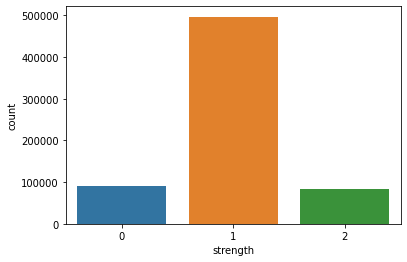

In [12]:
sns.countplot(data.strength);

In [13]:
password_tuple = np.array(data)

In [14]:
import random
random.shuffle(password_tuple)

In [15]:
X=[i[0] for i in password_tuple]
y=[i[1] for i in password_tuple]

In [16]:
def word_divide_char(inputs):
    character = []
    for i in inputs:
        character.append(i)
    return character

In [17]:
word_divide_char('ABHINAV')

['A', 'B', 'H', 'I', 'N', 'A', 'V']

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
vectorizer =  TfidfVectorizer(tokenizer=word_divide_char)

In [20]:
x = vectorizer.fit_transform(X)

In [21]:
x.shape

(669639, 130)

In [ ]:
vectorizer.get_feature_names()

In [23]:
first_doc = x[0]


In [24]:
first_doc.T.todense()

matrix([[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.56681146],
        [0.        ],
        [0.59139911],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0

In [28]:
df = pd.DataFrame(first_doc.T.todense(), index = vectorizer.get_feature_names(), columns=['TF-IDF'])

In [29]:
df.sort_values(by=['TF-IDF'],ascending=False)

,TF-IDF
7,0.591399
5,0.566811
z,0.336292
k,0.291748
d,0.285761
...,...
8,0.000000
6,0.000000
4,0.000000
3,0.000000


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

In [31]:
X_train.shape

(535711, 130)

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
clf=LogisticRegression(random_state=0,multi_class='multinomial')

In [34]:
clf.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial', random_state=0)

In [35]:
#doing prediction for specific custom data

In [49]:
dt=np.array(['asdsfv'])
pred=vectorizer.transform(dt)
clf.predict(pred)

array([0])

In [38]:
# means It is normal password

In [39]:
# Now Lets 
#do the prediction on X-Test data


In [40]:
y_pred=clf.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [41]:
#checking Accuracy of your model using confusion_matrix,accuracy_score

In [42]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [44]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
print("Accuracy score is {}".format(accuracy_score(y_test,y_pred)))

[[ 5128 12845    11]
 [ 3670 93072  2611]
 [   30  5037 11524]]
Accuracy score is 0.8192760289110567


In [45]:
# Creating report in our model

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.58      0.29      0.38     17984
           1       0.84      0.94      0.89     99353
           2       0.81      0.69      0.75     16591

    accuracy                           0.82    133928
   macro avg       0.74      0.64      0.67    133928
weighted avg       0.80      0.82      0.80    133928

